# Relative Strength Index (RSI)

**The relative strength index (RSI)** is a momentum indicator used in technical analysis. 

**RSI** measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

### Calculating RSI
The RSI uses a two-part calculation that starts with the following formula:

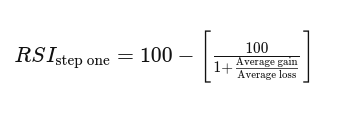

[investopedia](https://www.investopedia.com/terms/r/rsi.asp)

In [ ]:
!pip install mpl_finance
!pip install yfinance
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [2]:
import numpy as np, pandas as pd
# dataloader
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
# date
import datetime as dt
import matplotlib.dates as mdates
# stats
from scipy import stats
from scipy.stats import norm, skew
# visualization
from mpl_finance import candlestick_ohlc
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
ticker = 'SWVL'
start = dt.datetime(2022, 3, 1)
end = dt.datetime.today()

df = pdr.get_data_yahoo(ticker, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-01,9.910,9.93,9.91,9.93,9.93,7100
2022-03-02,9.920,9.92,9.91,9.91,9.91,11400
2022-03-03,9.919,9.92,9.91,9.92,9.92,11300
2022-03-04,9.920,9.93,9.91,9.92,9.92,24600
2022-03-07,9.920,9.95,9.92,9.94,9.94,79800


In [4]:
df['deltas'] = df['Adj Close']\
        .diff(1)\
        .dropna()
df['deltas']

Date
2022-03-01      NaN
2022-03-02   -0.020
2022-03-03    0.010
2022-03-04    0.000
2022-03-07    0.020
              ...  
2023-01-04   -0.027
2023-01-05   -0.022
2023-01-06    0.161
2023-01-09   -0.037
2023-01-10   -0.013
Name: deltas, Length: 218, dtype: float64

In [5]:
df['up'] = df['deltas'].clip(lower=0)
df['down'] = df['deltas'].clip(upper=0)
df.fillna('0', inplace=True)

In [6]:
days = 14

avg_gain = df['up'].rolling(window=days).mean()
avg_loss = abs(df['down'].rolling(window=days).mean())

In [7]:
relation_strength = avg_gain / avg_loss

In [8]:
df['RSI'] = 100. - (100. / (1. + relation_strength))
df

,Open,High,Low,Close,Adj Close,Volume,deltas,up,down,RSI
Date,,,,,,,,,,
2022-03-01,9.910,9.930,9.910,9.930,9.930,7100,0,0,0,NaN
2022-03-02,9.920,9.920,9.910,9.910,9.910,11400,-0.02,0.0,-0.02,NaN
2022-03-03,9.919,9.920,9.910,9.920,9.920,11300,0.01,0.01,0.0,NaN
2022-03-04,9.920,9.930,9.910,9.920,9.920,24600,0.0,0.0,0.0,NaN
2022-03-07,9.920,9.950,9.920,9.940,9.940,79800,0.02,0.02,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-04,0.170,0.180,0.154,0.161,0.161,8201800,-0.027,0.0,-0.027,34.754096
2023-01-05,0.163,0.164,0.133,0.139,0.139,5394700,-0.022,0.0,-0.022,34.083600
2023-01-06,0.153,0.466,0.145,0.300,0.300,149419400,0.161,0.161,0.0,59.465480


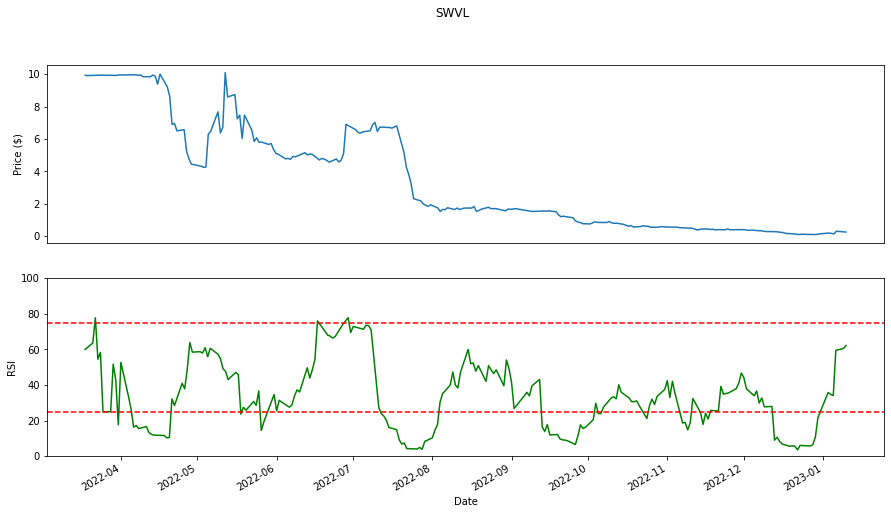

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 8))
ax1.get_xaxis().set_visible(False)
fig.suptitle(ticker)

df['Adj Close'].plot(ax=ax1)
ax1.set_ylabel('Price ($)')

df['RSI'].plot(c='g', ax=ax2)
ax2.set_ylim(0, 100)
ax2.axhline(25, color='r', linestyle='--')
ax2.axhline(75, color='r', linestyle='--')
ax2.set_ylabel('RSI');